In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [3]:
df_1988 = pd.read_csv('C:/Data/TN_Census_1998.csv')

In [4]:
df_1988.head()

,OBJECTID,CID,LST1988,ndvi_1988,PercentUnderPL_1
0,1,1,39.559330,0.466787,3.828873
1,2,1,43.355850,0.206260,3.828873
2,3,1,39.174946,0.409071,3.828873
3,4,1,39.943783,0.405281,3.828873
4,5,1,42.979797,0.320635,3.828873


In [5]:
df_1988.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          17400 non-null  int64  
 1   CID               17400 non-null  int64  
 2   LST1988           17400 non-null  float64
 3   ndvi_1988         17400 non-null  float64
 4   PercentUnderPL_1  17276 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 679.8 KB


In [7]:
#this new dataframe removes all rows with ndvi values that correspond with water or clouds
df_1988_nw = df_1988[(df_1988['ndvi_1988']>0)]

In [8]:
df_1988_nw.shape

(17386, 5)

<AxesSubplot:xlabel='ndvi_1988', ylabel='LST1988'>

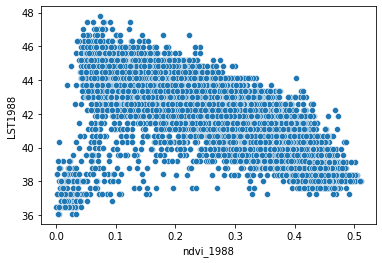

In [10]:
sns.scatterplot(data = df_1988_nw, x='ndvi_1988', y='LST1988')

<AxesSubplot:>

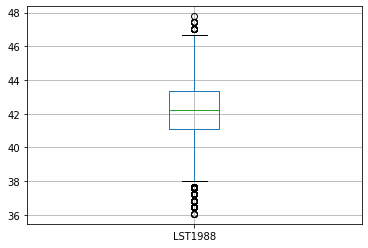

In [11]:
df_1988_nw.boxplot(column = ['LST1988'])

In [12]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [13]:
index_list = []
for feature in ['LST1988']:
    index_list.extend(outliers(df_1988_nw, 'LST1988'))

In [14]:
index_list

[100,
 109,
 114,
 136,
 296,
 930,
 982,
 1211,
 1219,
 1227,
 1247,
 1252,
 1255,
 1268,
 1274,
 1278,
 1288,
 1298,
 1310,
 1318,
 1331,
 1342,
 1344,
 1365,
 1373,
 1378,
 1381,
 1419,
 1466,
 1482,
 1487,
 1490,
 1669,
 1734,
 1817,
 2318,
 3070,
 3088,
 3496,
 3532,
 3546,
 3583,
 3591,
 3839,
 3998,
 4003,
 4008,
 4023,
 4063,
 4071,
 4101,
 4126,
 4141,
 4197,
 4222,
 4225,
 4235,
 4324,
 4352,
 4390,
 4391,
 4437,
 4440,
 4930,
 5010,
 5040,
 5173,
 5191,
 6039,
 6047,
 6059,
 6076,
 6094,
 6126,
 6136,
 6154,
 6166,
 6170,
 6189,
 6221,
 6236,
 6280,
 7095,
 7097,
 7099,
 7101,
 7107,
 7108,
 7109,
 7112,
 7114,
 7115,
 7116,
 7119,
 7120,
 7121,
 7122,
 7128,
 7131,
 7136,
 7137,
 7138,
 7141,
 7143,
 7145,
 7146,
 7150,
 7152,
 7158,
 7164,
 7175,
 7176,
 7177,
 7186,
 7191,
 7192,
 7193,
 7297,
 7299,
 7300,
 7301,
 7302,
 7307,
 7311,
 7312,
 7315,
 7316,
 7317,
 7319,
 7322,
 7323,
 7324,
 7325,
 7326,
 7327,
 7328,
 7330,
 7331,
 7332,
 7333,
 7335,
 7338,
 7342,
 7344,

In [15]:
def remove (df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [16]:
df_1988_cleaned = remove(df_1988_nw, index_list)

In [17]:
df_1988_cleaned.shape

(17017, 5)

<AxesSubplot:>

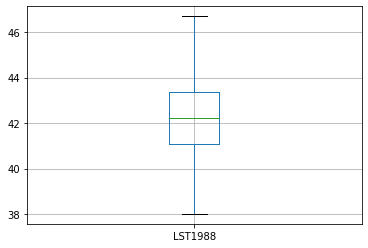

In [18]:
df_1988_cleaned.boxplot(column = ['LST1988'])

In [19]:
y = df_1988_cleaned['LST1988']
x = df_1988_cleaned[['ndvi_1988']]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                LST1988   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                 2.380e+04
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:25:39   Log-Likelihood:                -26421.
No. Observations:               17017   AIC:                         5.285e+04
Df Residuals:                   17015   BIC:                         5.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.7182      0.025   1864.468      0.0

In [20]:
df_1988_2 = pd.read_csv("C:/Data/Nash_Heat_Map/1988/LSTandNDVI1988_2.csv")

In [21]:
df_1988_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OBJECTID   17400 non-null  int64  
 1   CID        17400 non-null  int64  
 2   LST1988    17400 non-null  float64
 3   ndvi_1988  17400 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 543.9 KB


In [22]:
df_1988_2_no_water = df_1988_2[(df_1988_2['ndvi_1988']>=0)]

In [23]:
df_1988_2_no_water.shape

(17389, 4)

<AxesSubplot:xlabel='ndvi_1988', ylabel='LST1988'>

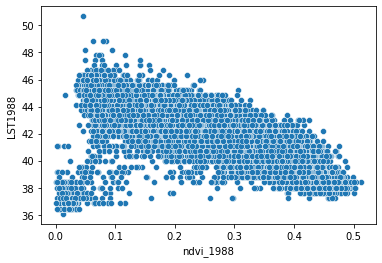

In [24]:
sns.scatterplot(data = df_1988_2_no_water, x='ndvi_1988', y='LST1988')

<AxesSubplot:>

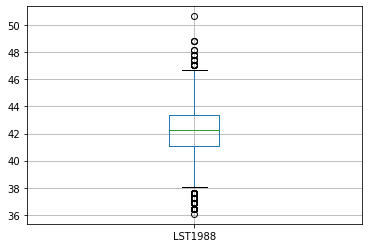

In [25]:
df_1988_2_no_water.boxplot(column = ['LST1988'])

In [26]:
index_list = []
for feature in ['LST1988']:
    index_list.extend(outliers(df_1988_2_no_water, 'LST1988'))

In [27]:
index_list

[761,
 924,
 970,
 1197,
 1207,
 1224,
 1234,
 1235,
 1244,
 1270,
 1273,
 1276,
 1281,
 1290,
 1295,
 1298,
 1301,
 1329,
 1344,
 1351,
 1366,
 1373,
 1377,
 1381,
 1437,
 1455,
 1461,
 1472,
 1478,
 1785,
 1836,
 2520,
 2576,
 2587,
 3066,
 3068,
 3090,
 3094,
 3504,
 3514,
 3529,
 3540,
 3552,
 3562,
 3569,
 3582,
 3997,
 4006,
 4030,
 4063,
 4118,
 4147,
 4158,
 4201,
 4225,
 4252,
 4263,
 4287,
 4324,
 4332,
 4345,
 4350,
 4364,
 4370,
 4407,
 4410,
 4432,
 4437,
 4457,
 4468,
 4491,
 4583,
 4975,
 5041,
 5095,
 5178,
 6008,
 6030,
 6058,
 6075,
 6107,
 6108,
 6132,
 6133,
 6144,
 7097,
 7099,
 7100,
 7102,
 7103,
 7109,
 7112,
 7113,
 7114,
 7115,
 7119,
 7122,
 7123,
 7126,
 7132,
 7134,
 7137,
 7146,
 7150,
 7151,
 7152,
 7155,
 7156,
 7157,
 7158,
 7166,
 7170,
 7171,
 7172,
 7174,
 7175,
 7177,
 7179,
 7180,
 7181,
 7182,
 7188,
 7190,
 7192,
 7296,
 7299,
 7301,
 7304,
 7305,
 7309,
 7311,
 7312,
 7313,
 7318,
 7322,
 7323,
 7324,
 7327,
 7329,
 7334,
 7335,
 7336,
 7337,
 7

In [28]:
df_1988_cleaned_2 = remove(df_1988_2_no_water, index_list)

In [29]:
df_1988_cleaned_2.shape

(17005, 4)

<AxesSubplot:>

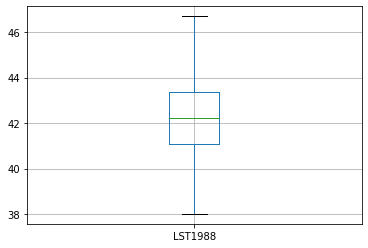

In [30]:
df_1988_cleaned_2.boxplot(column = ['LST1988'])

In [31]:
y = df_1988_cleaned_2['LST1988']
x = df_1988_cleaned_2[['ndvi_1988']]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                LST1988   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                 2.541e+04
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        22:28:50   Log-Likelihood:                -26101.
No. Observations:               17005   AIC:                         5.221e+04
Df Residuals:                   17003   BIC:                         5.222e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.7291      0.024   1913.699      0.0

In [32]:
#the R-squared values for the correlation between NDVI and land surface temperature in the two dataframes are 0.583 and 0.599

In [43]:
#this dataframe draws from the same NDVI and land surface temperature values, but it also includes census data on the percentage of residents living below the poverty line
#remove all rows that have a null value for PercentUnderPL_1
df_1988_bpl = df_1988_cleaned.dropna()

In [44]:
df_1988_bpl.shape

(16899, 5)

In [46]:
def classifier(row):
    if row['PercentUnderPL_1'] <= 25:
        return '0 - 25%'
    elif row['PercentUnderPL_1'] <= 50:
        return '26 - 50%'
    elif row['PercentUnderPL_1'] <= 75:
        return '51 - 75%'
    else:
        return '76 - 100%'

In [48]:
df_1988_bpl['PercentUnderPL_1_Classified'] = df_1988_bpl.apply(classifier, axis = 1)

C:\Users\there\AppData\Local\Temp\ipykernel_18208\2088443745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1988_bpl['PercentUnderPL_1_Classified'] = df_1988_bpl.apply(classifier, axis = 1)


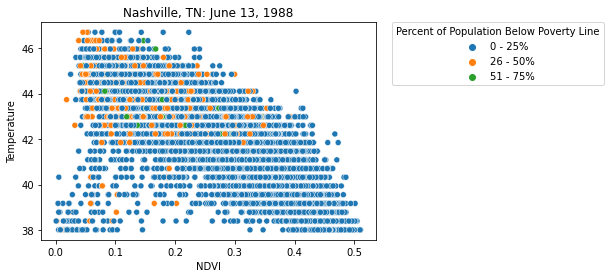

In [49]:
sns.scatterplot(data = df_1988_bpl, x='ndvi_1988', y='LST1988', hue = 'PercentUnderPL_1_Classified')
plt.title('Nashville, TN: June 13, 1988')
plt.xlabel('NDVI')
plt.ylabel('Temperature')
plt.legend(title = 'Percent of Population Below Poverty Line', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)